#### Задание 1

Загрузите файл HR.csv в pandas dataframe

#### Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np

In [125]:
data = pd.read_csv('HR.csv')
data['count'] = 1

In [126]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,count
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Задание 2

Рассчитайте основные статистики для переменных(среднее/mean, медиана/50%, мода/mode, мин/min, макс/max, сред.отклонение/std).

In [80]:
include =['object', 'float', 'int']
pd.concat([data.describe(include = include), data.mode()[:1]]).rename(index = {0:"mode"})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### Задание 3

Рассчитать и визуализировать корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [84]:
data.department.unique(), data.salary.unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [88]:
data_num = data.copy(deep=True)
data_num.department = data_num.department.replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], range(10)).astype('int')
data_num.salary = data_num.salary.replace(['low', 'medium', 'high'], range(3)).astype('int')
data_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


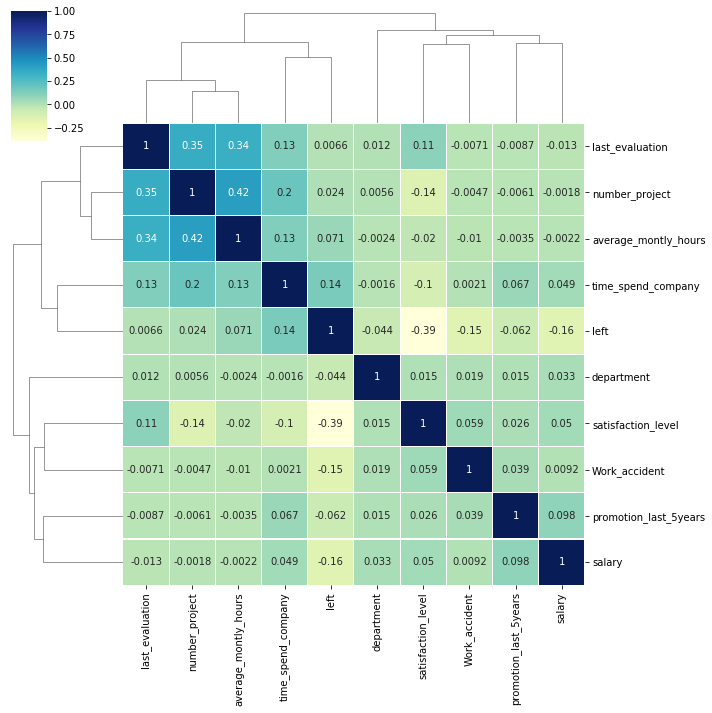

In [196]:
corrmat = data_num.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1, metric="correlation", annot=True)

cg

#### Вывод

Самый высокий уровень корреляции: number_projects (Количество проектов, выполненных за время работы) и average_monthly_hours - Среднее количество часов на рабочем месте в месяц

Наименее скоррелированные переменные: между left (уволился ли сотрудник) и satisfaction_level (уровень удовлетворенности работой)

#### Задача 4-6

Рассчитайте сколько сотрудников работает в каждом департаменте

Показать распределение сотрудников по зарплатам

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [134]:
data_table = data[data.left == 0].pivot_table('count', index='department', columns='salary', aggfunc=np.sum, margins=True)
data_table

salary,high,low,medium,All
department,,,,
IT,79,437,438,954
RandD,47,309,310,666
accounting,69,259,235,563
hr,39,243,242,524
management,224,121,194,539
marketing,71,276,308,655
product_mng,62,346,296,704
sales,255,1402,1469,3126
support,133,757,784,1674


In [136]:
#  распределение сотрудников по зарплатам
np.round(data_table*100/data_table.iloc[-1, -1], 1)

salary,high,low,medium,All
department,,,,
IT,0.7,3.8,3.8,8.3
RandD,0.4,2.7,2.7,5.8
accounting,0.6,2.3,2.1,4.9
hr,0.3,2.1,2.1,4.6
management,2.0,1.1,1.7,4.7
marketing,0.6,2.4,2.7,5.7
product_mng,0.5,3.0,2.6,6.2
sales,2.2,12.3,12.9,27.4
support,1.2,6.6,6.9,14.6


<Figure size 432x288 with 0 Axes>

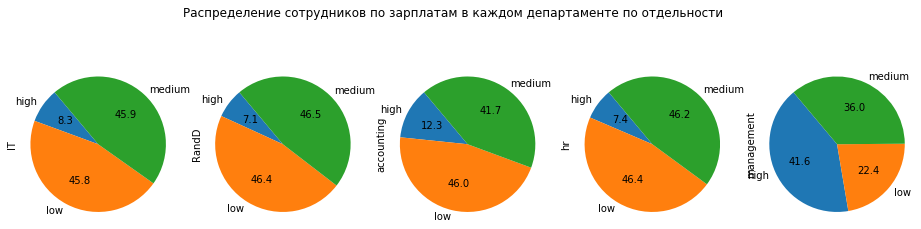

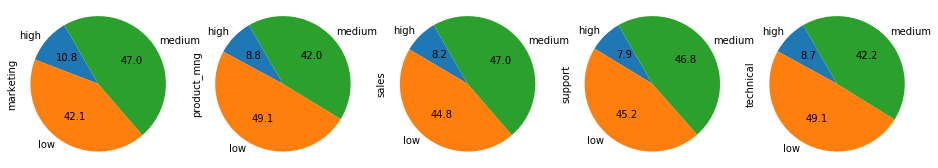

In [356]:
plt.figure()

data_table[:5][['high', 'low', 'medium']].T.plot.pie(subplots=True, figsize = (16, 4),
    title = 'Распределение сотрудников по зарплатам в каждом департаменте по отдельности', 
    stacked=True, legend=None, autopct='%.1f',startangle=130, radius=1.1)

data_table[5:10][['high', 'low', 'medium']].T.plot.pie(subplots=True, figsize = (16, 4), 
    stacked=True, legend=None, radius=1.1, autopct='%.1f', startangle=120)

plt.show()

#### Задача 7

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [368]:
# H0 - уровень оклада статистически не связан с данными о рабочем времени
# H1 - сотрудники с высоким окладом проводят больше времени

from scipy.stats import f_oneway

data_h_s = data[['average_montly_hours', 'salary']]

low = data_h_s[data_h_s.salary == 'low']['average_montly_hours']
medium = data_h_s[data_h_s.salary == 'medium']['average_montly_hours']
high = data_h_s[data_h_s.salary == 'high']['average_montly_hours']

alpha = 0.05   # Уровень значимости
F, p = f_oneway(low, medium, high)

print('F-статистика теста =', F, 'Значение pvalue из F-распределения', p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

F-статистика теста = 0.4583624407867663 Значение pvalue из F-распределения 0.6323271153144614
Same distribution (fail to reject H0)


#### Задача 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [518]:
# Средняя степень удовлетворенности, Среднее количество проектов

left_mean = data[['left', 'satisfaction_level', 'number_project']].groupby(['left']).mean()
left_mean.index = ['Working', 'Dismissed']
left_mean

,satisfaction_level,number_project
Working,0.666810,3.786664
Dismissed,0.440098,3.855503


In [520]:
q = data[['left', 'promotion_last_5years', 'count']].groupby(['left', 'promotion_last_5years']).count()
q.index = ['Working & Not promoted', 'Working & Promoted', 'Dismissed & Not promoted', 'Dismissed & Promoted']

In [507]:
working = data[['left']][data.left == 0].count()
dismissed = data[['left']][data.left == 1].count()

In [521]:
# Доля сотрудников с повышением за последние 5 лет

q['%'] = q['count'].apply(lambda x:  
                          x*100/working if x == q.iloc[0,0] or x == q.iloc[1,0] else x*100/dismissed)
q.sort_values(['count'], ascending = True)

,count,%
Dismissed & Promoted,19,0.532064
Working & Promoted,300,2.625131
Dismissed & Not promoted,3552,99.467936
Working & Not promoted,11128,97.374869


#### Задача 9

* Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборки

In [528]:
data_predict = data.iloc[:,:8]
data_predict.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [529]:
# Разделить данные на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_predict, test_size=0.3)

In [531]:
y_train, y_test = data_train['left'], data_test['left']

del data_train['left']
del data_test['left']

In [533]:
# Построить модель LDA, предсказывающую уволился ли сотрудник
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [535]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4495,0,0
4496,1,0
4497,0,0
4498,1,1


In [536]:
# Оценить качество модели на тестовой выборки
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(data_test))

0.7644444444444445